# Sampling and Reconstruction of Signals: Analysis of Aliasing Effects and Proper Signal Reconstruction

## Example 1: Demonstration of Aliasing

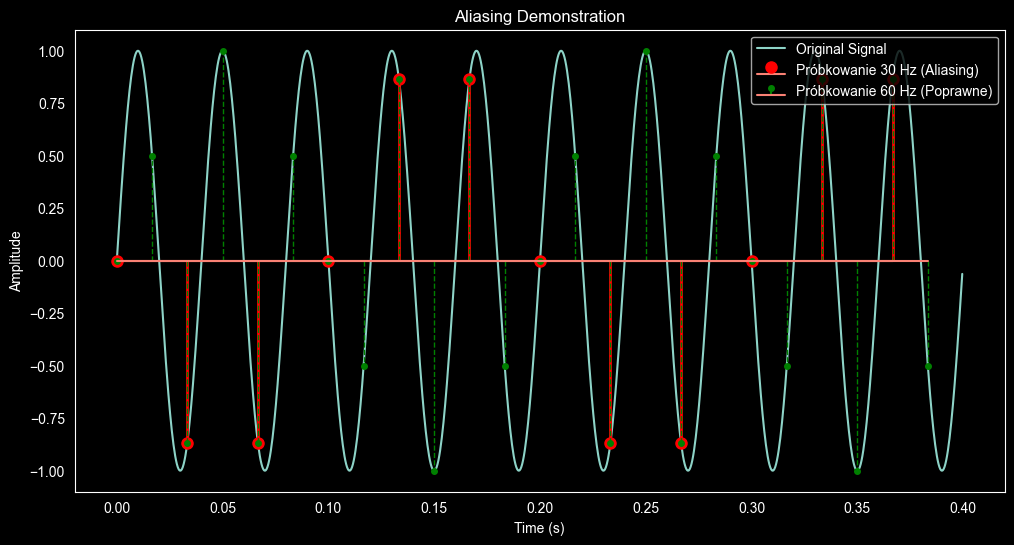

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Original signal parameters
f_signal = 25  # Frequency of the signal (Hz)
t = np.linspace(0, 0.4, 1000, endpoint=False)  # Time vector
signal = np.sin(2 * np.pi * f_signal * t)  # Original signal

# Sampling parameters
f_sample_low = 30  # Low sampling frequency (Hz)
f_sample_high = 60  # High sampling frequency (Hz)

# Sampling the signal
t_low = np.arange(0, 0.4, 1 / f_sample_low)
t_high = np.arange(0, 0.4, 1 / f_sample_high)
samples_low = np.sin(2 * np.pi * f_signal * t_low)
samples_high = np.sin(2 * np.pi * f_signal * t_high)

plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Original Signal')
markerline, stemlines, baseline = plt.stem(t_low, samples_low, label='Sampling 30 Hz')
plt.setp(stemlines, 'color', 'r', 'linewidth', 2)
plt.setp(markerline, 'color', 'r', 'markersize', 8)

markerline2, stemlines2, baseline2 = plt.stem(t_high, samples_high, label='Sampling 60 Hz' )
plt.setp(stemlines2, 'color', 'g', 'linestyle', '--', 'linewidth', 1)
plt.setp(markerline2, 'color', 'g', 'markersize', 4)

plt.title('Aliasing Demonstration')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

## Example 2: Signal Reconstruction

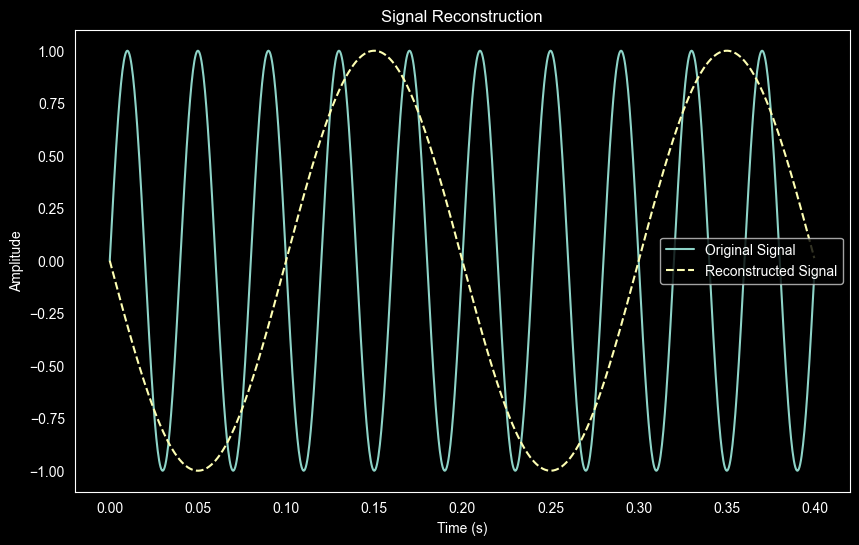

In [12]:
from scipy.signal import resample

# Reconstructing the signal using low sampling rate
num_samples = 1000
reconstructed_signal = resample(samples_low, num_samples)

# Plotting the reconstruction
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
plt.title('Signal Reconstruction')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

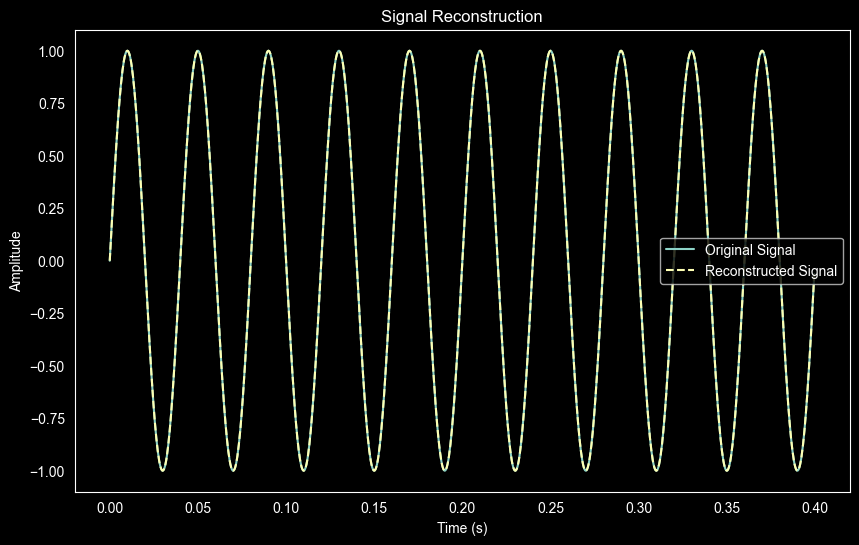

In [13]:
from scipy.signal import resample

# Reconstructing the signal using high sampling rate
num_samples = 1000
reconstructed_signal = resample(samples_high, num_samples)

# Plotting the reconstruction
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
plt.title('Signal Reconstruction')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Coding and Decoding Digital Signals

## Reconstructing Signals After Compression

In [26]:
#This example demonstrates signal reconstruction after compression using a simple DCT.
from scipy.fftpack import dct, idct

# Apply Discrete Cosine Transform (DCT)
def apply_dct(signal):
    return dct(signal, norm='ortho')

# Reconstruct signal using inverse DCT
def reconstruct_signal(dct_signal, threshold):
    dct_signal[np.abs(dct_signal) < threshold] = 0
    return idct(dct_signal, norm='ortho')

# Example
original_signal = np.array([3, 6, 9, 12, 15, 18])
dct_signal = apply_dct(original_signal)
reconstructed_signal5 = reconstruct_signal(dct_signal, threshold=5)
reconstructed_signal10 = reconstruct_signal(dct_signal, threshold=10)
reconstructed_signal15 = reconstruct_signal(dct_signal, threshold=15)

print("Original Signal:", original_signal)
print("Compressed Signal:", dct_signal)
print("Reconstructed Signal with threshold 5:", np.round(reconstructed_signal5, 2))
print("Reconstructed Signal with threshold 10:", np.round(reconstructed_signal10, 2))
print("Reconstructed Signal with threshold 15:", np.round(reconstructed_signal15, 2))

Original Signal: [ 3  6  9 12 15 18]
Compressed Signal: [25.7196423  0.         0.         0.         0.         0.       ]
Reconstructed Signal with threshold 5: [ 3.54  5.4   8.63 12.37 15.6  17.46]
Reconstructed Signal with threshold 10: [ 3.54  5.4   8.63 12.37 15.6  17.46]
Reconstructed Signal with threshold 15: [10.5 10.5 10.5 10.5 10.5 10.5]


## Trade-off Analysis Between Compression Ratio and Signal Distortion

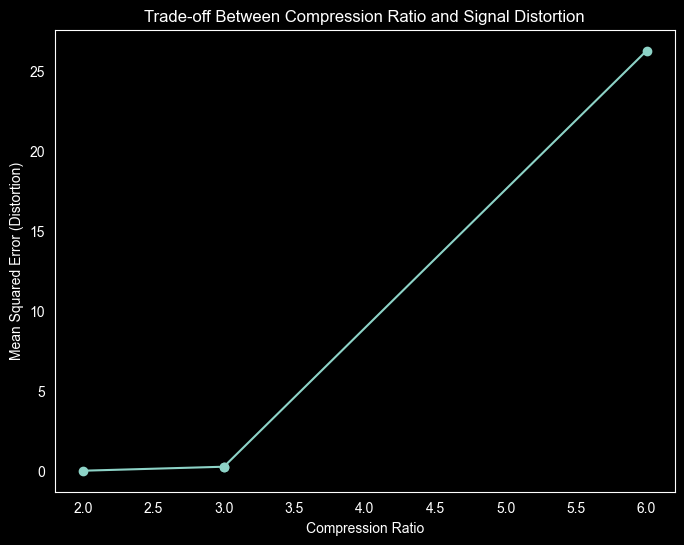

{'thresholds': [1, 5, 10, 15],
 'compression_ratios': [np.float64(2.0),
  np.float64(3.0),
  np.float64(3.0),
  np.float64(6.0)],
 'distortions': [np.float64(0.009618943233420371),
  np.float64(0.25961894323341966),
  np.float64(0.25961894323341966),
  np.float64(26.25)]}

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

# Original Signal
# N = 64  # Number of samples
# t = np.linspace(0, 1, N)
# signal = np.sin(2 * np.pi * 5 * t)  # Example sine wave
signal = np.array([3, 6, 9, 12, 15, 18])

# Function for compression, reconstruction, and analysis
def analyze_tradeoff(signal, thresholds):
    original_size = len(signal)
    results = {"thresholds": [], "compression_ratios": [], "distortions": []}

    for threshold in thresholds:
        # Apply DCT
        dct_coeffs = dct(signal, norm='ortho')

        # Apply Thresholding (Compression)
        compressed_coeffs = np.where(abs(dct_coeffs) > threshold, dct_coeffs, 0)

        # Calculate Compression Ratio
        compressed_size = np.count_nonzero(compressed_coeffs)
        compression_ratio = original_size / compressed_size

        # Reconstruct Signal
        reconstructed_signal = idct(compressed_coeffs, norm='ortho')

        # Calculate Distortion (MSE)
        mse = np.mean((signal - reconstructed_signal) ** 2)

        # Store Results
        results["thresholds"].append(threshold)
        results["compression_ratios"].append(compression_ratio)
        results["distortions"].append(mse)

    return results

# Perform Analysis for a Range of Thresholds
thresholds = [1, 5, 10, 15]  # Threshold values
results = analyze_tradeoff(signal, thresholds)

# Plot Compression Ratio vs. Distortion
plt.figure(figsize=(8, 6))
plt.plot(results["compression_ratios"], results["distortions"], marker='o')
plt.title("Trade-off Between Compression Ratio and Signal Distortion")
plt.xlabel("Compression Ratio")
plt.ylabel("Mean Squared Error (Distortion)")
plt.grid()
plt.show()
results